# Work with airlines Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
airlines_df = pd.read_csv(r"E:\Assignment\Assignment_6\Dataset\airlines.csv")
airlines_df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,dissatisfied,Loyal Customer,28,Personal Travel,Business,3849,3,5,3,5,...,3,3,5,2,3,1,1,3,0,0.0
1,satisfied,Loyal Customer,15,Personal Travel,Eco,2060,3,3,3,3,...,5,4,5,3,5,3,4,4,0,0.0
2,dissatisfied,disloyal Customer,37,Business travel,Business,854,1,1,1,1,...,1,5,3,4,4,4,4,5,0,0.0
3,satisfied,Loyal Customer,58,Personal Travel,Eco,1146,5,5,5,5,...,5,4,4,4,4,3,4,3,88,71.0
4,satisfied,Loyal Customer,17,Business travel,Business,4909,3,3,3,3,...,4,4,2,5,2,3,2,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,satisfied,Loyal Customer,30,Business travel,Business,1709,1,5,1,1,...,5,5,3,4,5,4,4,5,0,10.0
49996,dissatisfied,Loyal Customer,42,Business travel,Eco,1642,3,4,4,4,...,3,3,3,2,4,2,4,3,23,38.0
49997,dissatisfied,disloyal Customer,26,Business travel,Eco Plus,3280,1,1,1,4,...,4,4,2,5,2,4,4,4,20,0.0
49998,satisfied,Loyal Customer,59,Personal Travel,Eco,817,3,3,3,3,...,1,4,4,4,5,5,4,4,0,0.0


In [4]:
airlines_df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             163
dtype: int64

In [5]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       50000 non-null  object 
 1   Customer Type                      50000 non-null  object 
 2   Age                                50000 non-null  int64  
 3   Type of Travel                     50000 non-null  object 
 4   Class                              50000 non-null  object 
 5   Flight Distance                    50000 non-null  int64  
 6   Seat comfort                       50000 non-null  int64  
 7   Departure/Arrival time convenient  50000 non-null  int64  
 8   Food and drink                     50000 non-null  int64  
 9   Gate location                      50000 non-null  int64  
 10  Inflight wifi service              50000 non-null  int64  
 11  Inflight entertainment             50000 non-null  int

In [6]:
airlines_df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

# Data Preprocessing & Handle missing values in airline dataset

In [7]:
for column in airlines_df.select_dtypes(include=np.number).columns:
    airlines_df[column].fillna(airlines_df[column].median(), inplace=True)

for column in airlines_df.select_dtypes(include=['object']).columns:
    airlines_df[column].fillna(airlines_df[column].mode()[0], inplace=True)

In [8]:
airlines_df.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

# Encode categorical variables 

In [10]:
cat_features = ['Customer Type', 'Type of Travel', 'Class']
for col in cat_features:
    airlines_df[col] = LabelEncoder().fit_transform(airlines_df[col])

airlines_df['satisfaction'] = LabelEncoder().fit_transform(airlines_df['satisfaction'])
airlines_df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,28,1,0,3849,3,5,3,5,...,3,3,5,2,3,1,1,3,0,0.0
1,1,0,15,1,1,2060,3,3,3,3,...,5,4,5,3,5,3,4,4,0,0.0
2,0,1,37,0,0,854,1,1,1,1,...,1,5,3,4,4,4,4,5,0,0.0
3,1,0,58,1,1,1146,5,5,5,5,...,5,4,4,4,4,3,4,3,88,71.0
4,1,0,17,0,0,4909,3,3,3,3,...,4,4,2,5,2,3,2,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,30,0,0,1709,1,5,1,1,...,5,5,3,4,5,4,4,5,0,10.0
49996,0,0,42,0,1,1642,3,4,4,4,...,3,3,3,2,4,2,4,3,23,38.0
49997,0,1,26,0,2,3280,1,1,1,4,...,4,4,2,5,2,4,4,4,20,0.0
49998,1,0,59,1,1,817,3,3,3,3,...,1,4,4,4,5,5,4,4,0,0.0


# Define features and target

In [11]:
X_airlines = airlines_df.drop(columns=['satisfaction'])
y_airlines = airlines_df['satisfaction']
X_airlines
y_airlines

0        0
1        1
2        0
3        1
4        1
        ..
49995    1
49996    0
49997    0
49998    1
49999    1
Name: satisfaction, Length: 50000, dtype: int64

# Standardize numerical features

In [12]:
scaler = StandardScaler()
X_airlines = scaler.fit_transform(X_airlines)
scaler
X_airlines

array([[-0.47356091, -0.75506145,  1.49617904, ..., -0.27274068,
        -0.38605715, -0.39027206],
       [-0.47356091, -1.61526039,  1.49617904, ...,  0.49906496,
        -0.38605715, -0.39027206],
       [ 2.11166078, -0.15953911, -0.66836921, ...,  1.2708706 ,
        -0.38605715, -0.39027206],
       ...,
       [ 2.11166078, -0.88739975, -0.66836921, ...,  0.49906496,
         0.14161077, -0.39027206],
       [-0.47356091,  1.29618217,  1.49617904, ...,  0.49906496,
        -0.38605715, -0.39027206],
       [-0.47356091, -0.02720081, -0.66836921, ..., -1.04454632,
        -0.38605715, -0.39027206]])

# Train-test split

In [13]:
X_train_air, X_test_air, y_train_air, y_test_air = train_test_split(X_airlines, y_airlines, test_size=0.2, random_state=42)

# Train logistic regression model

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_train_air, y_train_air)

LogisticRegression()

# Predictions

In [15]:
y_pred_air = log_reg.predict(X_test_air)
y_pred_air

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

# Model evaluation

In [16]:
accuracy = accuracy_score(y_test_air, y_pred_air)
conf_matrix = confusion_matrix(y_test_air, y_pred_air)
report = classification_report(y_test_air, y_pred_air)
roc_auc = roc_auc_score(y_test_air, log_reg.predict_proba(X_test_air)[:, 1])

print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)
print(f"ROC AUC Score: {roc_auc}")


Logistic Regression Metrics:
Accuracy: 0.8302
Confusion Matrix:
[[3667  860]
 [ 838 4635]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4527
           1       0.84      0.85      0.85      5473

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

ROC AUC Score: 0.9064278881999637


# Plot ROC Curve

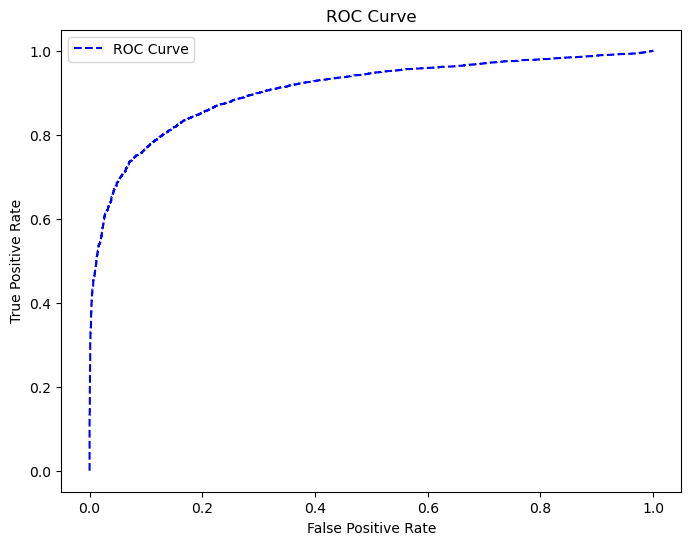

In [17]:
fpr, tpr, _ = roc_curve(y_test_air, log_reg.predict_proba(X_test_air)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', color='b', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()